### 454. Métricas - Teórico
<h1>Avaliação de Modelos de Classificação</h1><h2>Tema central</h2><p>Métricas e técnicas para avaliar o desempenho de modelos de classificação.</p><h2>Tópicos abordados</h2><h3>Métricas principais</h3><ul><li>Acurácia</li><li>Acurácia balanceada</li><li>Precision (Precisão)</li><li>Recall</li><li>F1 Score</li><li>Especificidade</li><li>AUC (Area Under Curve)</li></ul><h3>Matriz de Confusão</h3><ul><li>Verdadeiros positivos (TP)</li><li>Falsos positivos (FP)</li><li>Falsos negativos (FN)</li><li>Verdadeiros negativos (TN)</li></ul><h3>Exemplos</h3><ul><li>Churn de clientes</li><li>Detecção de fraudes</li></ul><h3>Curva ROC</h3><ul><li>Taxa de verdadeiros positivos (TPR)</li><li>Taxa de falsos positivos (FPR)</li><li>Área sob a curva (AUC)</li><li>Interpretação da AUC</li></ul><p>Em cada tópico o vídeo explica os conceitos, fórmulas de cálculo e exemplos de aplicação das métricas. O objetivo é avaliar se o modelo de classificação criado está aderente aos objetivos de negócio definidos. As métricas servem para mensurar o desempenho do modelo.</p>

### 455. Métricas na Prática
<h1>Tema central: Métricas de avaliação de modelos de Machine Learning</h1><h2>Importação de bibliotecas e dados</h2><ul><li>Importação do Pandas e do conjunto de dados churnData</li><li>Análise do tipo de dados com df.dtypes</li><li>Transformação da coluna totalCharges de object para float</li></ul><h2>Pré-processamento dos dados</h2><ul><li>Remoção de valores NA com df.dropna</li><li>Separação das features em numéricas e categóricas</li><li>Codificação da variável target y com LabelEncoder</li><li>One-hot encoding das features categóricas com get_dummies</li></ul><h2>Treinamento e avaliação do modelo</h2><ul><li>Divisão entre conjuntos de treino e teste com train_test_split</li><li>Treinamento de modelo de Regressão Logística</li><li>Cálculo de predições no conjunto de teste</li><li>Avaliação do modelo com diversas métricas:<ul><li>Matriz de Confusão</li><li>Acurácia</li><li>Acurácia Balanceada</li><li>Precisão</li><li>Recall</li><li>F1 Score</li><li>Curva ROC</li></ul></li></ul><h2>Comparação visual das métricas</h2><ul><li>Plotagem lado a lado das métricas de treino e teste</li><li>Facilita a visualização do desempenho geral do modelo</li></ul><p>Em resumo, o vídeo aborda o processo completo de construção e avaliação de um modelo de classificação, utilizando diversas métricas para medir seu desempenho.</p>

In [99]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [100]:
df_abt = pd.read_excel('churn_data.xlsx')
df_abt.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer,42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [101]:
df_abt["TotalCharges"] = pd.to_numeric(df_abt["TotalCharges"],errors='coerce')

In [102]:
df_abt = df_abt.dropna()

In [103]:
df_abt.dtypes

customerID           object
tenure                int64
PhoneService         object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [104]:
cat_vars = ['PhoneService',"Contract","PaperlessBilling","PaymentMethod"]
num_vars = ["tenure","MonthlyCharges","TotalCharges"]
modeling_vars = cat_vars + num_vars

In [105]:
X = df_abt.filter(modeling_vars).copy()
y = df_abt['Churn'].copy()
y = pd.DataFrame(y)
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7037,No
7038,No
7039,No
7040,No


In [106]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(y.Churn) 
y.Churn = le.transform(y.Churn)

In [107]:
X = pd.get_dummies(X,dtype=int)
X

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,1,0,1,0,0,0,1,0,0,1,0
1,34,56.95,1889.50,0,1,0,1,0,1,0,0,0,0,1
2,2,53.85,108.15,0,1,1,0,0,0,1,0,0,0,1
3,45,42.30,1840.75,1,0,0,1,0,1,0,1,0,0,0
4,2,70.70,151.65,0,1,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,72,21.15,1419.40,0,1,0,0,1,0,1,1,0,0,0
7038,24,84.80,1990.50,0,1,0,1,0,0,1,0,0,0,1
7039,72,103.20,7362.90,0,1,0,1,0,0,1,0,1,0,0
7040,11,29.60,346.45,1,0,1,0,0,0,1,0,0,1,0


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [109]:
X_train

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
1527,72,21.00,1493.75,0,1,0,0,1,1,0,1,0,0,0
2219,20,89.95,1648.45,0,1,1,0,0,1,0,0,0,1,0
324,69,60.05,4176.70,1,0,0,0,1,0,1,1,0,0,0
1640,7,20.65,134.05,0,1,0,1,0,1,0,0,0,0,1
6999,3,35.45,106.85,1,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,4,101.15,385.90,0,1,1,0,0,1,0,0,0,1,0
677,2,34.70,62.25,1,0,1,0,0,0,1,0,0,1,0
4234,16,19.05,326.65,0,1,0,1,0,1,0,0,0,0,1
351,17,44.60,681.40,0,1,0,1,0,1,0,0,0,0,1


In [110]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
y_pred=lr.predict(X_test)

In [112]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,tenure,MonthlyCharges,TotalCharges,PhoneService_No,PhoneService_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn,label
4705,6,78.95,494.95,0,1,1,0,0,0,1,0,0,1,0,0,1
579,2,19.65,38.80,0,1,1,0,0,0,1,0,0,0,1,0,0
2601,72,98.65,7129.45,0,1,0,0,1,0,1,1,0,0,0,0,0
683,40,103.75,4188.40,0,1,0,1,0,0,1,0,1,0,0,0,0
3629,17,25.15,412.60,0,1,0,0,1,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,44,20.60,926.00,0,1,0,1,0,1,0,1,0,0,0,0,0
5462,64,70.15,4480.70,0,1,0,1,0,0,1,0,0,0,1,0,0
5035,20,78.80,1641.30,0,1,1,0,0,1,0,0,0,1,0,0,0
2175,30,85.15,2555.90,0,1,1,0,0,1,0,0,0,1,0,1,0


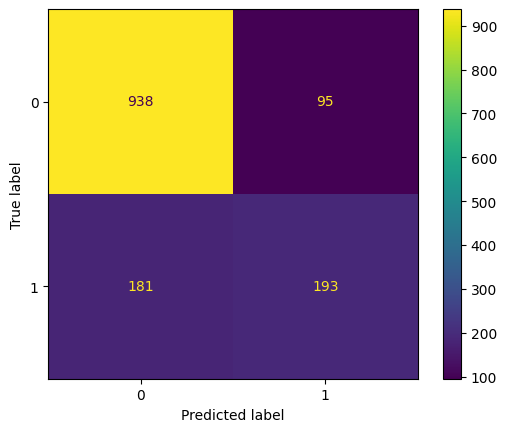

In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm= confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm).plot(values_format = 'd')
plt.show()

In [114]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.7969416785206259
Acurácia (Teste): 0.8038379530916845
Acurácia Balanceada (Treino): 0.714282613150641
Acurácia Balanceada (Teste): 0.7120388153501302
Precision (Treino): 0.6406374501992032
Precision (Teste): 0.6701388888888888
Recall (Treino): 0.5377926421404682
Recall (Teste): 0.516042780748663
F1-Score (Treino): 0.5847272727272728
F1-Score (Teste): 0.5830815709969789
ROCAUC (Treino): 0.83677909168448
ROCAUC (Teste): 0.8441898628676147


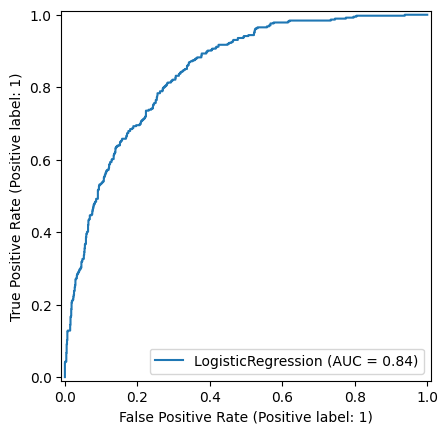

In [115]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr, X_test, y_test);

In [116]:
metricas = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test))],
    'precision': [precision_score(y_train, lr.predict(X_train)), precision_score(y_test, lr.predict(X_test))],
    'recall': [recall_score(y_train, lr.predict(X_train)), recall_score(y_test, lr.predict(X_test))],
    'f1_score': [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test))],
    'rocauc': [roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.796942,0.714283,0.640637,0.537793,0.584727,0.836779
1,Logistic Regression,teste,0.803838,0.712039,0.670139,0.516043,0.583082,0.844190


### 456. Métricas - Exercício
<h1>Tema central: Desafio de análise de performance de modelo de Machine Learning</h1><h2>Introdução</h2><ul><li>Saudação inicial aos alunos</li><li>Contextualização: desafio após aulas sobre implementação e comparação de métricas de modelos de ML</li></ul><h2>Desafio proposto</h2><ul><li>Receber uma base de dados sobre empréstimos pessoais<ul><li>Variável target (Y): personal loan (empréstimo pessoal)</li></ul></li><li>Treinar modelo de Regressão Logística</li><li>Fazer teste do modelo</li><li>Analisar métricas:<ul><li>Acurácia</li><li>Acurácia balanceada</li><li>Recall</li><li>F1-score</li></ul></li><li>Plotar matriz de confusão</li><li>Comparar métricas para avaliar performance do modelo</li></ul><h2>Conclusão</h2><ul><li>Desejo de bom desafio aos alunos</li><li>Aguarda alunos na correção e gabarito</li><li>Despedida</li></ul>

### 457. Métricas - Gabarito
<h1>Implementando um modelo de classificação em Python</h1><h2>Dados</h2><ul><li>Importando bibliotecas (pandas)</li><li>Lendo base de dados<ul><li>Verificando valores nulos</li><li>Separando features (X) e target (y)</li></ul></li></ul><h2>Pré-processamento</h2><ul><li>Separando dados em treino e teste</li></ul><h2>Modelo</h2><ul><li>Logistic Regression<ul><li>Treinando modelo</li><li>Fazendo predições</li></ul></li></ul><h2>Avaliação</h2><ul><li><p>Matriz de confusão</p></li><li><p>Métricas</p><ul><li>Accuracy</li><li>Precision, Recall</li><li>F1 Score</li><li>ROC/AUC</li></ul></li><li><p>Curva ROC</p><ul><li>Taxa de falso positivo próxima de 1</li><li>F1 Score não satisfatório</li></ul></li></ul><h2>Conclusão</h2><ul><li>Forma de implementar modelo de classificação</li><li>Notebooks como referência para funções e algoritmos</li></ul>

In [117]:
df_abt = pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',engine='openpyxl')
df_abt.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


In [118]:
df_abt = df_abt.dropna()

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X = df_abt[["Age", "Experience", "Income", "Family", "CCAvg", "Education", "Mortgage", "CreditCard", "Securities_Account", "CD_Account", "Online"]]
y = df_abt['Personal_Loan'].copy()
y = pd.DataFrame(y)
y

,Personal_Loan
0,0
1,0
2,0
3,0
4,0
...,...
4995,0
4996,0
4997,0
4998,0


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [122]:
X_train

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,CreditCard,Securities_Account,CD_Account,Online
4127,43,19,82,2,1.8,2,0,1,0,0,1
3677,59,33,43,2,0.3,1,0,1,0,0,0
274,30,5,74,4,2.2,1,0,1,1,0,0
2399,62,36,41,2,1.0,3,154,0,1,0,1
4234,50,24,91,1,0.8,3,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
28,56,30,48,1,2.2,3,0,1,0,0,1
4964,53,27,110,1,4.9,1,0,0,0,0,1
4585,35,11,180,1,3.6,3,571,1,0,1,1
4129,29,3,10,4,0.4,1,87,1,0,0,1


In [123]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
lr = model.fit(X_train, y_train)

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
y_pred=lr.predict(X_test)

In [125]:
X_test.assign(churn = y_test).assign(label = lr.predict(X_test))

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,CreditCard,Securities_Account,CD_Account,Online,churn,label
1984,26,1,55,4,1.7,2,175,0,0,0,1,0,0
883,51,26,78,1,1.2,1,305,0,0,0,1,0,0
1645,56,32,89,4,1.0,2,90,0,1,0,1,0,0
1706,56,31,84,1,0.1,3,0,0,0,0,1,0,0
4038,55,30,54,3,1.7,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3347,65,41,78,3,2.0,3,0,1,0,1,1,0,1
4670,52,26,194,1,1.7,1,0,0,0,0,1,0,0
902,57,33,95,2,1.6,1,0,0,0,0,0,0,0
4491,41,16,64,4,0.4,1,0,0,0,0,1,0,0


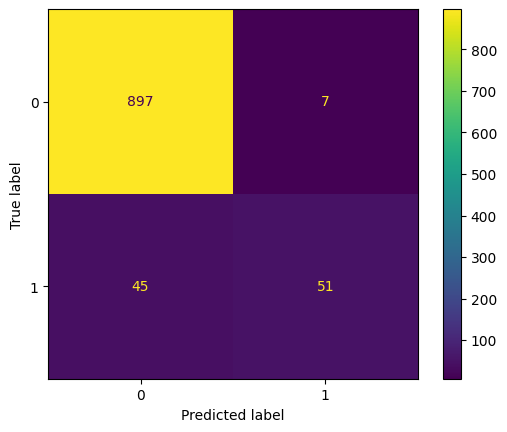

In [126]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm= confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix = cm).plot(values_format = 'd')
plt.show()

In [127]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

print(f"Acurácia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia (Teste): {accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Acurácia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acurácia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Precision (Treino): {precision_score(y_train, lr.predict(X_train))}")
print(f"Precision (Teste): {precision_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train))}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"F1-Score (Treino): {f1_score(y_train, lr.predict(X_train))}")
print(f"F1-Score (Teste): {f1_score(y_test, lr.predict(X_test))}")
print("====================================")
print(f"ROCAUC (Treino): {roc_auc_score(y_train, lr.predict_proba(X_train)[:,1])}")
print(f"ROCAUC (Teste): {roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])}")

Acurácia (Treino): 0.95125
Acurácia (Teste): 0.948
Acurácia Balanceada (Treino): 0.8066118178466076
Acurácia Balanceada (Teste): 0.7617533185840708
Precision (Treino): 0.8225255972696246
Precision (Teste): 0.8793103448275862
Recall (Treino): 0.6276041666666666
Recall (Teste): 0.53125
F1-Score (Treino): 0.7119645494830132
F1-Score (Teste): 0.6623376623376623
ROCAUC (Treino): 0.9559776283646756
ROCAUC (Teste): 0.948020372418879


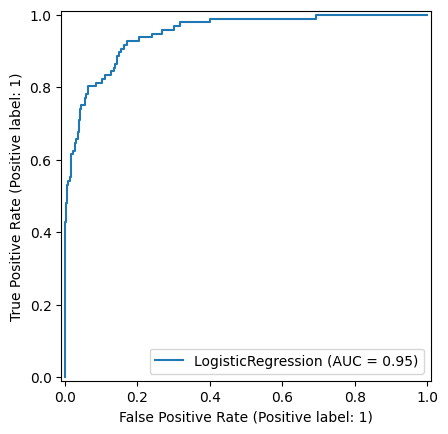

In [128]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(lr, X_test, y_test);

In [129]:
metricas = {
    'model': ['Logistic Regression', 'Logistic Regression'],
    'modo': ['treino', 'teste'],
    'accuracy': [accuracy_score(y_train, lr.predict(X_train)), accuracy_score(y_test, lr.predict(X_test))],
    'balanced_accuracy': [balanced_accuracy_score(y_train, lr.predict(X_train)), balanced_accuracy_score(y_test, lr.predict(X_test))],
    'precision': [precision_score(y_train, lr.predict(X_train)), precision_score(y_test, lr.predict(X_test))],
    'recall': [recall_score(y_train, lr.predict(X_train)), recall_score(y_test, lr.predict(X_test))],
    'f1_score': [f1_score(y_train, lr.predict(X_train)), f1_score(y_test, lr.predict(X_test))],
    'rocauc': [roc_auc_score(y_train, lr.predict_proba(X_train)[:,1]), roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])]

}

pd.DataFrame(metricas)

,model,modo,accuracy,balanced_accuracy,precision,recall,f1_score,rocauc
0,Logistic Regression,treino,0.95125,0.806612,0.822526,0.627604,0.711965,0.955978
1,Logistic Regression,teste,0.94800,0.761753,0.879310,0.531250,0.662338,0.948020
